In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("loan.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
df.dtypes

age                 int64
gender             object
occupation         object
education_level    object
marital_status     object
income              int64
credit_score        int64
loan_status        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [7]:
df.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

In [8]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


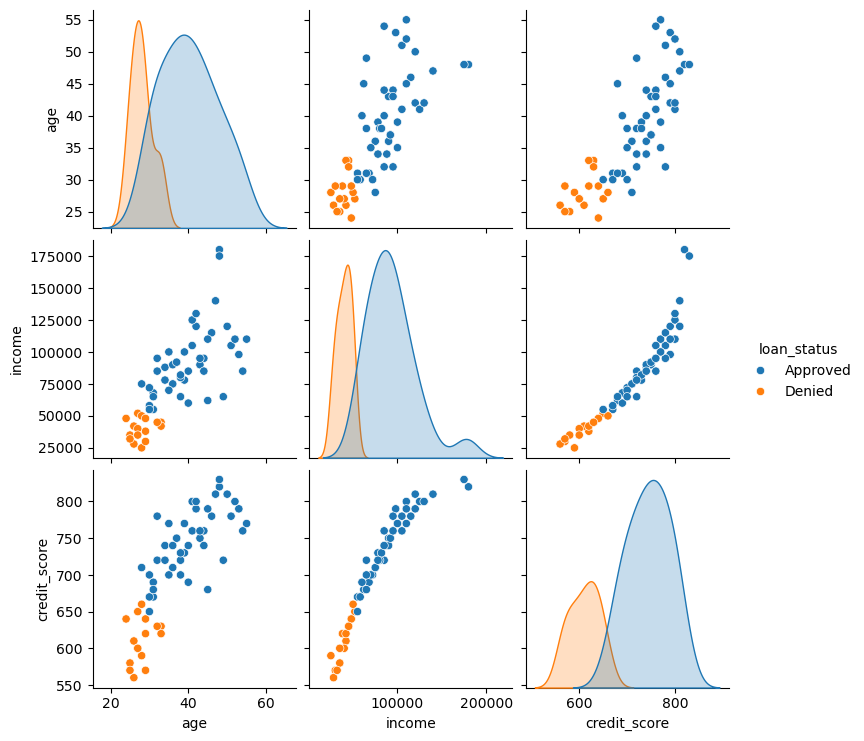

In [9]:
sns.pairplot(df, hue='loan_status') 
plt.show()

In [11]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [12]:
df_encoded.head()

,age,income,credit_score,gender_Male,occupation_Analyst,occupation_Architect,occupation_Artist,occupation_Banker,occupation_Chef,occupation_Consultant,...,occupation_Stylist,occupation_Teacher,occupation_Veterinarian,occupation_Writer,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's,marital_status_Single,loan_status_Denied
0,32,85000,720,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,45,62000,680,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
2,28,25000,590,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
3,51,105000,780,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,36,75000,710,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [13]:
df_encoded.dtypes

age                            int64
income                         int64
credit_score                   int64
gender_Male                     bool
occupation_Analyst              bool
occupation_Architect            bool
occupation_Artist               bool
occupation_Banker               bool
occupation_Chef                 bool
occupation_Consultant           bool
occupation_Dentist              bool
occupation_Designer             bool
occupation_Doctor               bool
occupation_Editor               bool
occupation_Electrician          bool
occupation_Engineer             bool
occupation_HR                   bool
occupation_IT                   bool
occupation_Lawyer               bool
occupation_Manager              bool
occupation_Marketing            bool
occupation_Musician             bool
occupation_Nurse                bool
occupation_Pharmacist           bool
occupation_Photographer         bool
occupation_Pilot                bool
occupation_Professor            bool
o

In [14]:
df_encoded.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          61 non-null     int64
 1   income                       61 non-null     int64
 2   credit_score                 61 non-null     int64
 3   gender_Male                  61 non-null     bool 
 4   occupation_Analyst           61 non-null     bool 
 5   occupation_Architect         61 non-null     bool 
 6   occupation_Artist            61 non-null     bool 
 7   occupation_Banker            61 non-null     bool 
 8   occupation_Chef              61 non-null     bool 
 9   occupation_Consultant        61 non-null     bool 
 10  occupation_Dentist           61 non-null     bool 
 11  occupation_Designer          61 non-null     bool 
 12  occupation_Doctor            61 non-null     bool 
 13  occupation_Editor            61 non-null     bool 
 

In [21]:
X = df_encoded.drop('loan_status_Denied',axis=1)
y = df_encoded['loan_status_Denied']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33)

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {score}")

Accuracy score: 1.0


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[9, 0],
       [0, 4]])

In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         9
        True       1.00      1.00      1.00         4

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [48]:
new_df = pd.DataFrame(np.zeros((1,X_train.shape[1])), columns = X_train.columns)

new_df.at[0,'age'] = 35
new_df.at[0,'income'] = 95600

prediction = model.predict(new_df)
print(prediction)

if prediction[0]:
    result = 'Denied'
else:
    result = "Approved"
print(result)

[False]
Approved


In [51]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,X,y,cv=5)
print(cv_scores)
print(cv_scores.mean())

[1.         0.91666667 0.91666667 1.         1.        ]
0.9666666666666666


In [52]:
df_encoded['loan_status_Denied'].value_counts()

loan_status_Denied
False    45
True     16
Name: count, dtype: int64

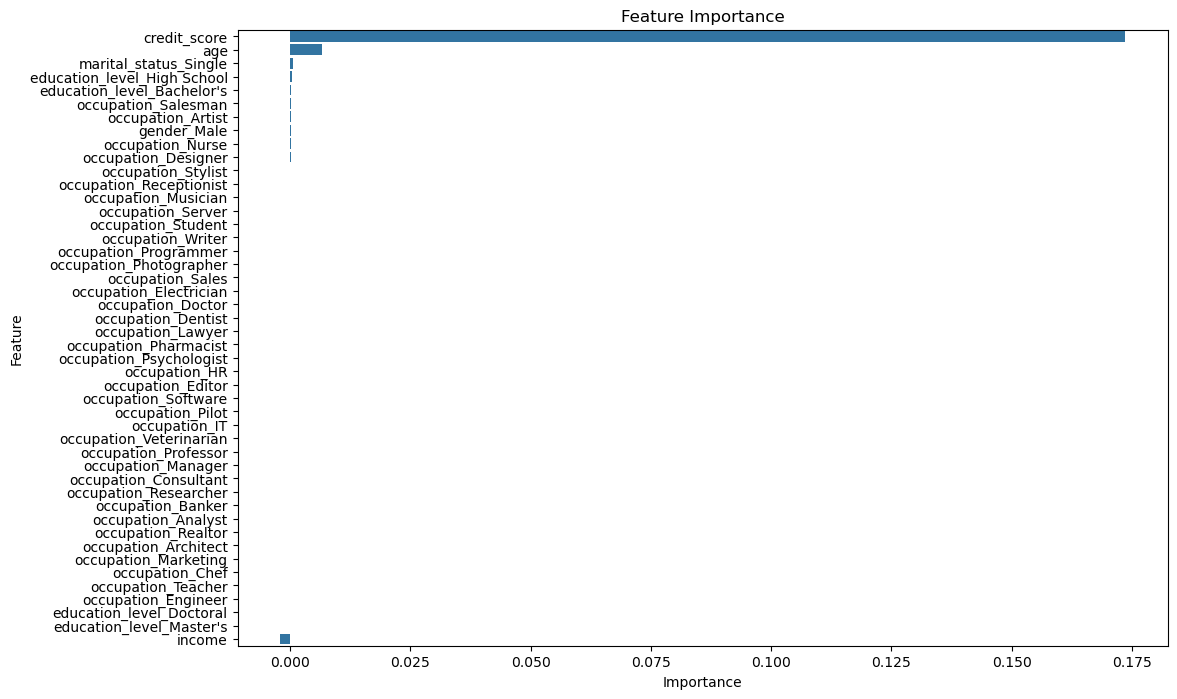

In [55]:
feature_importance = pd.DataFrame({'Feature':X.columns, 'Importance':model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance',ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(x='Importance',y='Feature',data=feature_importance)
plt.title('Feature Importance')
plt.show()
          
